In [ ]:
! pip install pandas tqdm nltk matplotlib

In [2]:
import pandas as pd
import nltk
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
from tqdm import tqdm

nltk.download('punkt')
tqdm.pandas()
plt.rcParams["figure.dpi"] = 300

train_stances = pd.read_csv('train_stances.csv', index_col="Body ID")
train_bodies = pd.read_csv('train_bodies.csv', index_col="Body ID")

test_stances = pd.read_csv('competition_test_stances.csv', index_col="Body ID")
test_bodies = pd.read_csv('competition_test_bodies.csv', index_col="Body ID")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thomasvant/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
# XSum
train_bodies_xsum = pd.read_csv(f'train_bodies_google_pegasus-xsum.csv', index_col="Body ID")
test_bodies_xsum = pd.read_csv(f'test_bodies_google_pegasus-xsum.csv', index_col="Body ID")

# CNN/DailyNews
train_bodies_cnn_dailymail = pd.read_csv(f'train_bodies_google_pegasus-cnn_dailymail.csv', index_col="Body ID")
test_bodies_cnn_dailymail = pd.read_csv(f'test_bodies_google_pegasus-cnn_dailymail.csv', index_col="Body ID")

# Newsroom
train_bodies_newsroom = pd.read_csv(f'train_bodies_google_pegasus-newsroom.csv', index_col="Body ID")
test_bodies_newsroom = pd.read_csv(f'test_bodies_google_pegasus-newsroom.csv', index_col="Body ID")

# Multi-News
train_bodies_multi_news = pd.read_csv(f'train_bodies_google_pegasus-multi_news.csv', index_col="Body ID")
test_bodies_multi_news = pd.read_csv(f'test_bodies_google_pegasus-multi_news.csv', index_col="Body ID")

# Reduction calculation

In [38]:
def count(df):
    return df["articleBody"].progress_apply(count_singular)

def count_singular(string):
    try:
        return len(nltk.word_tokenize(string))
    except TypeError:
#         print(string)
        return 0

## Train data

In [39]:
count_train = count(train_bodies)
count_test = count(test_bodies)

100%|████████████████████████████████████████| 904/904 [00:01<00:00, 796.70it/s]


In [40]:
def reduction(df, train):
    count_df = count(df)
    if train:
        return abs((count_df - count_train) / count_train)
    else:
        return abs((count_df - count_test) / count_test)

def process(df, train, file_name, save=True):
    count_df = count(df)
    
    if train:
        reduction_df = count_df / count_train
    else:
        reduction_df = count_df / count_test
        
    print(file_name)
    print((reduction_df > 1.0).value_counts())
    
    if train:
        df[reduction_df > 1.0] = train_bodies[reduction_df > 1.0]
    else:
        df[reduction_df > 1.0] = test_bodies[reduction_df > 1.0]

    if save:
        if train:
            df.to_csv(f"train_bodies_{file_name}_cleaned.csv")
        else:
            df.to_csv(f"test_bodies_{file_name}_cleaned.csv")
    return reduction(df, train)

In [47]:
xsum_train = process(train_bodies_xsum, True, "xsum", True)
cnn_dailymail_train = process(train_bodies_cnn_dailymail, True, "cnn_dailymail", True)
newsroom_train = process(train_bodies_newsroom, True, "newsroom", True)
multi_news_train = process(train_bodies_multi_news, True, "multi_news", True)

100%|████████████████████████████████████| 1683/1683 [00:00<00:00, 10629.17it/s]


xsum
False    1683
Name: articleBody, dtype: int64


100%|█████████████████████████████████████| 1683/1683 [00:00<00:00, 7240.43it/s]


cnn_dailymail
False    1683
Name: articleBody, dtype: int64


100%|█████████████████████████████████████| 1683/1683 [00:00<00:00, 4085.71it/s]


newsroom
False    1683
Name: articleBody, dtype: int64


100%|█████████████████████████████████████| 1683/1683 [00:00<00:00, 3232.67it/s]


multi_news
False    1683
Name: articleBody, dtype: int64


100%|█████████████████████████████████████| 1683/1683 [00:00<00:00, 3246.32it/s]


In [42]:
def boxplot(df):
    fig, ax = plt.subplots()
    bp = ax.boxplot(reduction_df)
    ax.set(
        axisbelow=True,
        title='Comparison of reduction of tokens between summarizing models',
        xlabel='Summarizing model',
        ylabel='Reduction',
    )
    ax.set_xticklabels(reduction_df.columns)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.show()

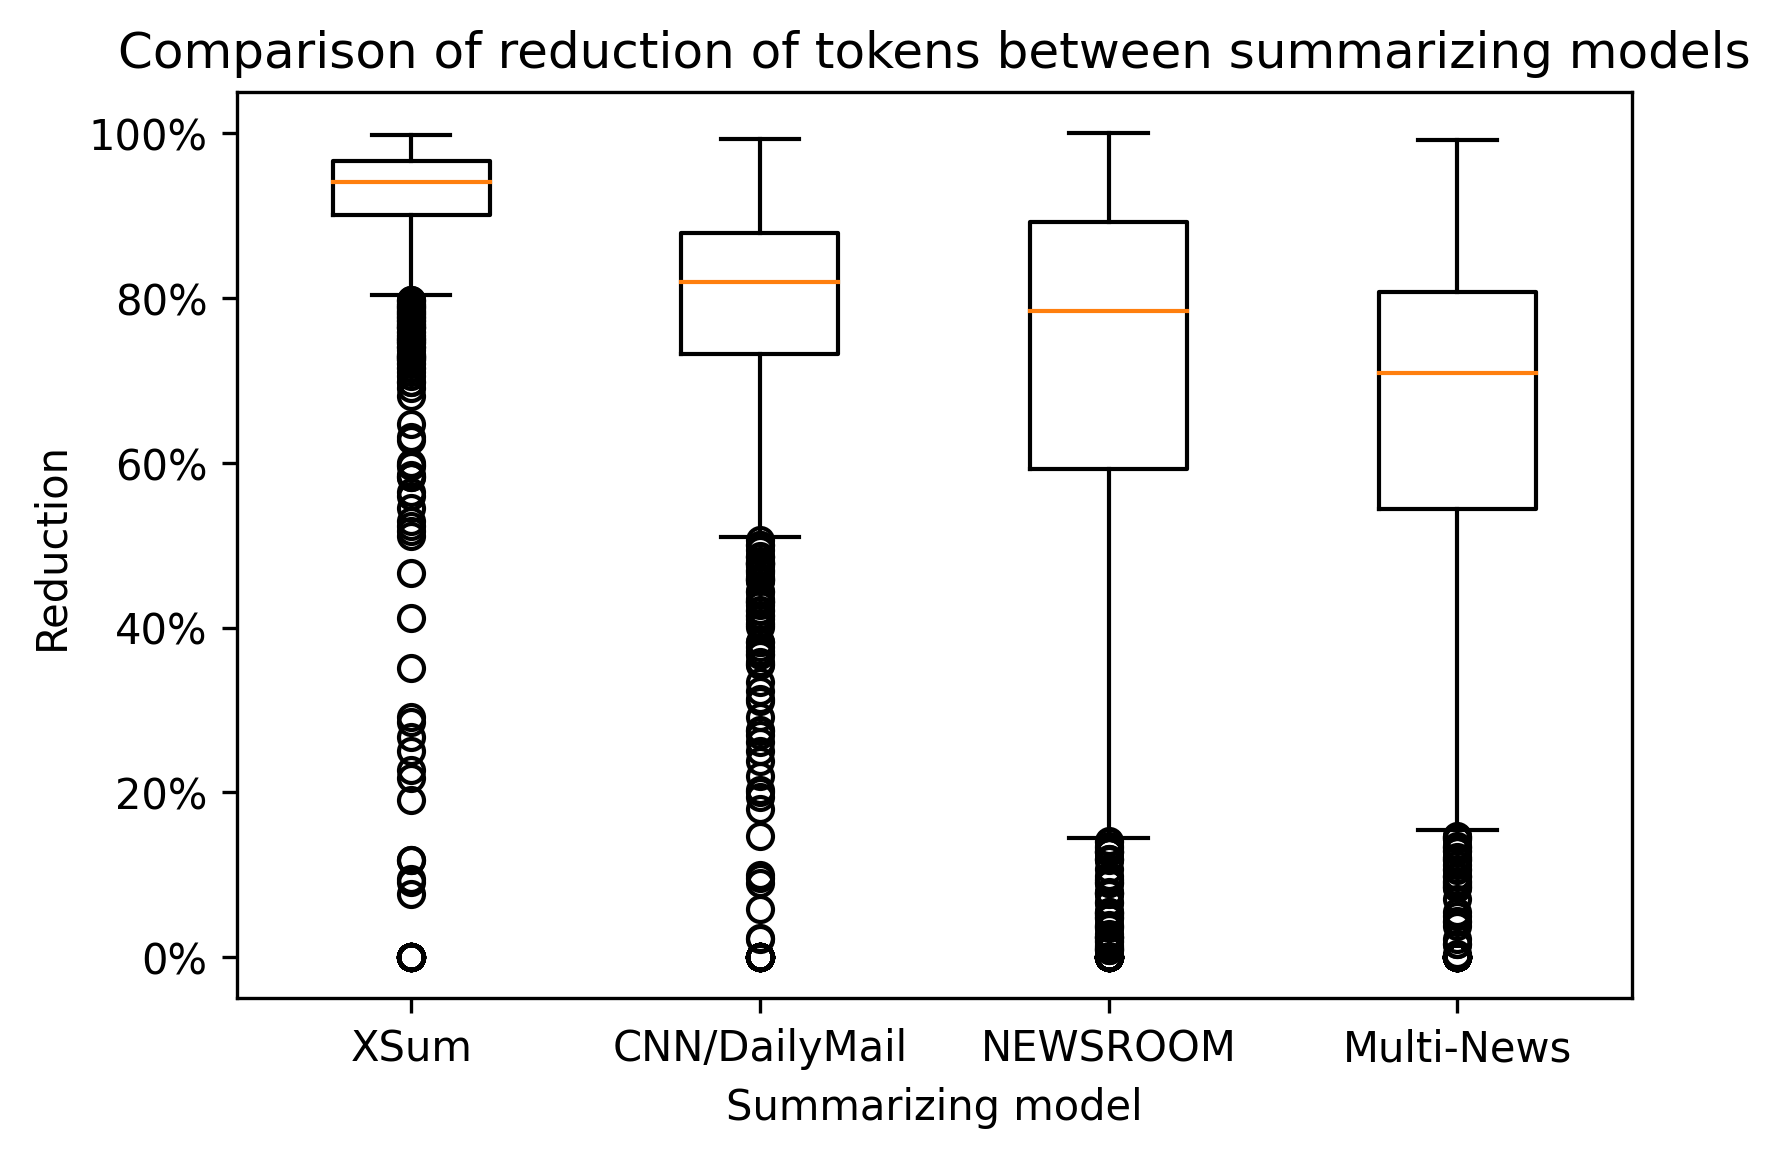

In [43]:
reduction_df = pd.DataFrame({"XSum": xsum_train, 
                             "CNN/DailyMail":cnn_dailymail_train, 
                             "NEWSROOM":newsroom_train,
                             "Multi-News":multi_news_train})
boxplot(reduction_df)

In [46]:
xsum_test = process(test_bodies_xsum, False, "xsum", True)
cnn_dailymail_test = process(test_bodies_cnn_dailymail, False, "cnn_dailymail", True)
newsroom_test = process(test_bodies_newsroom, False, "newsroom", True)
multi_news_test = process(test_bodies_multi_news, False, "multi_news", True)

100%|██████████████████████████████████████| 904/904 [00:00<00:00, 10033.40it/s]


xsum
False    904
Name: articleBody, dtype: int64


100%|███████████████████████████████████████| 904/904 [00:00<00:00, 6281.53it/s]


cnn_dailymail
False    904
Name: articleBody, dtype: int64


100%|███████████████████████████████████████| 904/904 [00:00<00:00, 4224.08it/s]


newsroom
False    904
Name: articleBody, dtype: int64


100%|███████████████████████████████████████| 904/904 [00:00<00:00, 3296.85it/s]


multi_news
False    904
Name: articleBody, dtype: int64


100%|███████████████████████████████████████| 904/904 [00:00<00:00, 3286.16it/s]


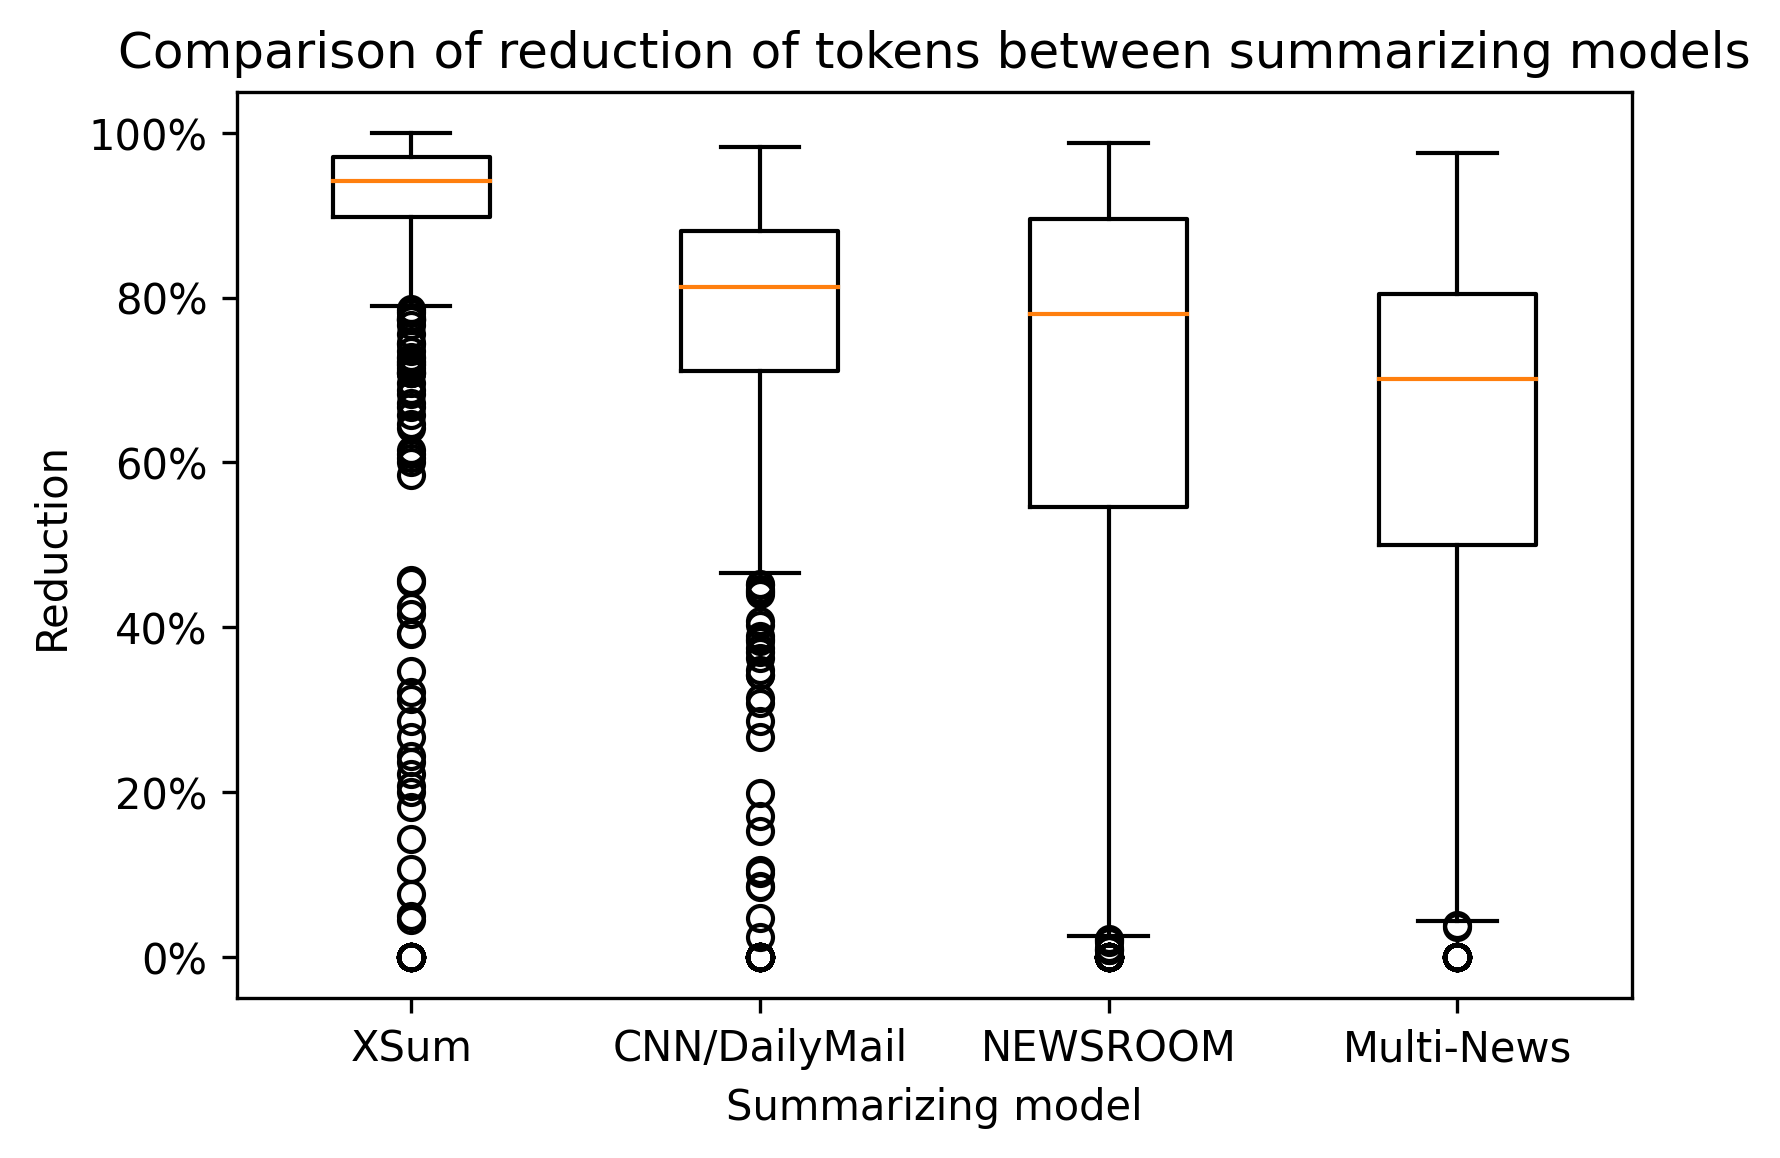

In [45]:
reduction_df = pd.DataFrame({"XSum": xsum_test, 
                             "CNN/DailyMail":cnn_dailymail_test, 
                             "NEWSROOM":newsroom_test,
                             "Multi-News":multi_news_test})
boxplot(reduction_df)